# Step 1: Import Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To show plots inside notebook
%matplotlib inline


# Step 2: Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv("height-weight.csv")

# Display first 5 rows
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#  Step 3: Data Exploration

In [3]:
# Check dataset shape (rows, columns)
print("Dataset Shape:", df.shape)

# Check info about columns
df.info()

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Basic statistics
df.describe()


Dataset Shape: (23, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes
Missing Values:
 Weight    0
Height    0
dtype: int64


,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


# Step 4: Data Visualization

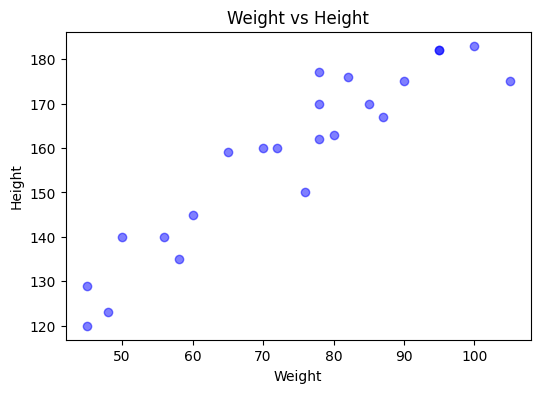

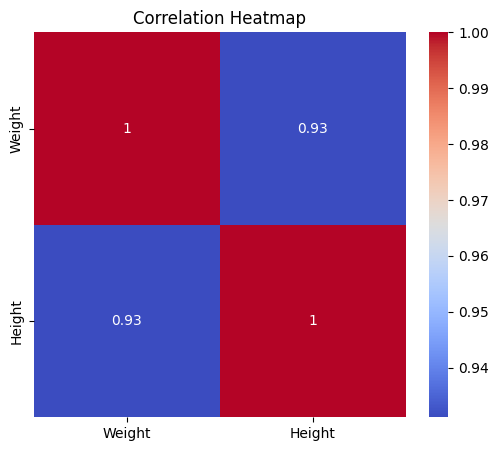

In [8]:
# Scatter plot of Weight vs Height
plt.figure(figsize=(6,4))
plt.scatter(df['Weight'], df['Height'], color='blue', alpha=0.5)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Step 5: Feature & Target Selection

In [9]:
# Features (X) and Target (y)
X = df[['Weight']]   # Independent variable
y = df['Height']     # Dependent variable

# Step 6: Train-Test Split

In [10]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 18
Testing samples: 5


# Step 7: Train Linear Regression Model

In [11]:
# Initialize model
model = LinearRegression()

# Fit model on training data
model.fit(X_train, y_train)

# Model parameters
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_)


Intercept (b0): 85.96709053063559
Coefficient (b1): [0.9630459]


# Step 8: Make Predictions

In [12]:
# Predict on test data
y_pred = model.predict(X_test)

# Show first few predictions
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison.head()


,Actual,Predicted
0,177,161.084671
1,170,161.084671
2,120,129.304156
3,182,177.456451
4,159,148.565074


# Step 9: Model Evaluation

In [13]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 9.822657814519232
Mean Squared Error (MSE): 109.77592599051658
Root Mean Squared Error (RMSE): 10.477400726827078
R-squared (R2): 0.776986986042344


# Step 10: Visualization of Regression Line

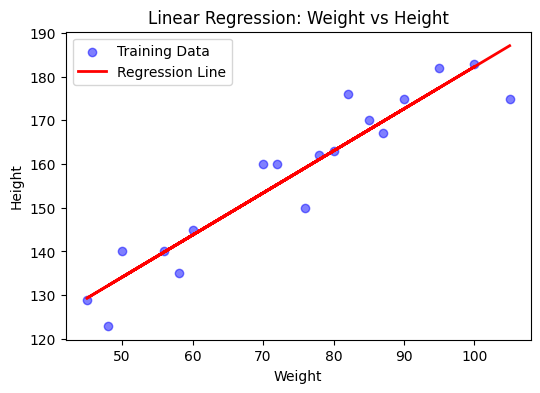

In [14]:
# Plot regression line on training data
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color="blue", alpha=0.5, label="Training Data")
plt.plot(X_train, model.predict(X_train), color="red", linewidth=2, label="Regression Line")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Linear Regression: Weight vs Height")
plt.legend()
plt.show()


# Step 11: Predict for New Values

In [15]:
# Example: Predict height for given weights
new_weights = pd.DataFrame({'Weight': [50, 70, 90]})
predicted_heights = model.predict(new_weights)

print(pd.DataFrame({'Weight': new_weights['Weight'], 'Predicted Height': predicted_heights}))


   Weight  Predicted Height
0      50        134.119386
1      70        153.380304
2      90        172.641222
